In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# NLP libs
import spacy, nltk, gensim, sklearn

meta_data = pd.read_csv("metadata.tsv", sep = "\t")
meta_data.columns

Index(['show_uri', 'show_name', 'show_description', 'publisher', 'language',
       'rss_link', 'episode_uri', 'episode_name', 'episode_description',
       'duration', 'show_filename_prefix', 'episode_filename_prefix'],
      dtype='object')

In [8]:
# Subset with only relevant features and drop missing values
features = ["show_name", "show_description", "publisher", "language", "episode_name", "episode_description", "duration"]
features_df = meta_data[features]
#features_df.isna().sum()
print(features_df.shape)
features_df = features_df.dropna()
print(features_df.shape)
features_df.isna().sum()

(105360, 7)
(105153, 7)


show_name              0
show_description       0
publisher              0
language               0
episode_name           0
episode_description    0
duration               0
dtype: int64

In [25]:
e = 5
print(features_df.episode_description[e]) # Some descs are empty / "."

. 


In [12]:
# # Remove newlines (initial analysis showed that eps descriptions do not contain newlines)
# episode_description_new = [" ".join(desc.split()) for desc in features_df.episode_description]
# features_df["episode_description_clean"] = episode_description_new # append df

In [28]:
### OBS: TAKES A LOT OF TIME! Approx. 30 min
# Make spacy objects according to English language model

nlp = spacy.load("en_core_web_sm")
# spacy_obj = [nlp(i) for i in features_df.episode_description]

In [29]:
features_df["eps_nlp"] = spacy_obj
features_df.head()

,show_name,show_description,publisher,language,episode_name,episode_description,duration,episode_description_clean,eps_nlp
0,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,On the first ever episode of Kream in your Kof...,"(On, the, first, ever, episode, of, Kream, in,..."
1,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,"See something, say something. It’s a mantra ma...","(See, something, ,, say, something, ., It, ’s,..."
2,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,Today’s episode is a sit down Michael and Omar...,"(Today, ’s, episode, is, a, sit, down, Michael..."
3,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,Join us as we take a look at all current Chief...,"(Join, us, as, we, take, a, look, at, all, cur..."
4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,The modern morality tail of how to stay good f...,"(The, modern, morality, tail, of, how, to, sta..."


In [37]:
x = 0
for i in range(100):
    [token.text for token in features_df.eps_nlp[i]]

100


In [44]:
# Tokenise episodes
eps_tokens_all = []

for episode in features_df.eps_nlp:
    eps_tokens_all.append([tok.text for tok in episode])

features_df["episode_tokens"] = eps_tokens_all

print(features_df.eps_nlp[0])
print(features_df.episode_tokens[0])
features_df.head()

On the first ever episode of Kream in your Koffee, Katie talks about tips for Christmas shopping. We also get a little insight into who and what we’ll be hearing about in next weeks episode! 
['On', 'the', 'first', 'ever', 'episode', 'of', 'Kream', 'in', 'your', 'Koffee', ',', 'Katie', 'talks', 'about', 'tips', 'for', 'Christmas', 'shopping', '.', 'We', 'also', 'get', 'a', 'little', 'insight', 'into', 'who', 'and', 'what', 'we', '’ll', 'be', 'hearing', 'about', 'in', 'next', 'weeks', 'episode', '!']


,show_name,show_description,publisher,language,episode_name,episode_description,duration,episode_description_clean,eps_nlp,episode_tokens
0,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,On the first ever episode of Kream in your Kof...,"(On, the, first, ever, episode, of, Kream, in,...","[On, the, first, ever, episode, of, Kream, in,..."
1,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,"See something, say something. It’s a mantra ma...","(See, something, ,, say, something, ., It, ’s,...","[See, something, ,, say, something, ., It, ’s,..."
2,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,Today’s episode is a sit down Michael and Omar...,"(Today, ’s, episode, is, a, sit, down, Michael...","[Today, ’s, episode, is, a, sit, down, Michael..."
3,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,Join us as we take a look at all current Chief...,"(Join, us, as, we, take, a, look, at, all, cur...","[Join, us, as, we, take, a, look, at, all, cur..."
4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,The modern morality tail of how to stay good f...,"(The, modern, morality, tail, of, how, to, sta...","[The, modern, morality, tail, of, how, to, sta..."


In [61]:
### OBS: TAKES A LOT OF TIME! Approx. 30 min
# Tokenise show
# spacy_obj_show = [nlp(i) for i in features_df.show_description]
features_df["show_nlp"] = spacy_obj_show

eps_tokens_all_show = []
for show in features_df.eps_nlp:
    eps_tokens_all_show.append([tok.text for tok in show])

features_df["show_tokens"] = eps_tokens_all_show

print(features_df.show_nlp[0])
print(features_df.show_tokens[0])
features_df.head()

A 20-something blunt female takes on the world and gives you her take on it. Enjoy visits from special guests and friends to give insight and input into interesting situations.
['On', 'the', 'first', 'ever', 'episode', 'of', 'Kream', 'in', 'your', 'Koffee', ',', 'Katie', 'talks', 'about', 'tips', 'for', 'Christmas', 'shopping', '.', 'We', 'also', 'get', 'a', 'little', 'insight', 'into', 'who', 'and', 'what', 'we', '’ll', 'be', 'hearing', 'about', 'in', 'next', 'weeks', 'episode', '!']


,show_name,show_description,publisher,language,episode_name,episode_description,duration,episode_description_clean,eps_nlp,episode_tokens,word_count,show_nlp,show_tokens
0,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,On the first ever episode of Kream in your Kof...,"(On, the, first, ever, episode, of, Kream, in,...","[On, the, first, ever, episode, of, Kream, in,...",39,"(A, 20, -, something, blunt, female, takes, on...","[On, the, first, ever, episode, of, Kream, in,..."
1,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,"See something, say something. It’s a mantra ma...","(See, something, ,, say, something, ., It, ’s,...","[See, something, ,, say, something, ., It, ’s,...",171,"(Ever, wonder, what, murder, took, place, on, ...","[See, something, ,, say, something, ., It, ’s,..."
2,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,Today’s episode is a sit down Michael and Omar...,"(Today, ’s, episode, is, a, sit, down, Michael...","[Today, ’s, episode, is, a, sit, down, Michael...",115,"(Inside, the, 18, is, your, source, for, all, ...","[Today, ’s, episode, is, a, sit, down, Michael..."
3,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,Join us as we take a look at all current Chief...,"(Join, us, as, we, take, a, look, at, all, cur...","[Join, us, as, we, take, a, look, at, all, cur...",52,"(Your, favorite, podcast, for, everything, @Ch...","[Join, us, as, we, take, a, look, at, all, cur..."
4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,The modern morality tail of how to stay good f...,"(The, modern, morality, tail, of, how, to, sta...","[The, modern, morality, tail, of, how, to, sta...",88,"(The, comedy, podcast, about, toxic, character...","[The, modern, morality, tail, of, how, to, sta..."


In [45]:
# write to file to avoid long processing in the future
# features_df.to_csv("podcast_nlp_features.csv", index=False)

In [62]:
# Add word count features
# Epsiode desc
eps_word_count = []
for desc in features_df.episode_tokens:
    eps_word_count.append(len(desc))

features_df["eps_word_count"] = eps_word_count

# Show desc
show_word_count = []
for desc in features_df.episode_tokens:
    show_word_count.append(len(desc))

features_df["show_word_count"] = show_word_count

0     39
1    171
2    115
3     52
4     88
Name: show_word_count, dtype: int64

Text(0.5, 0.98, 'Number of words, distribution')

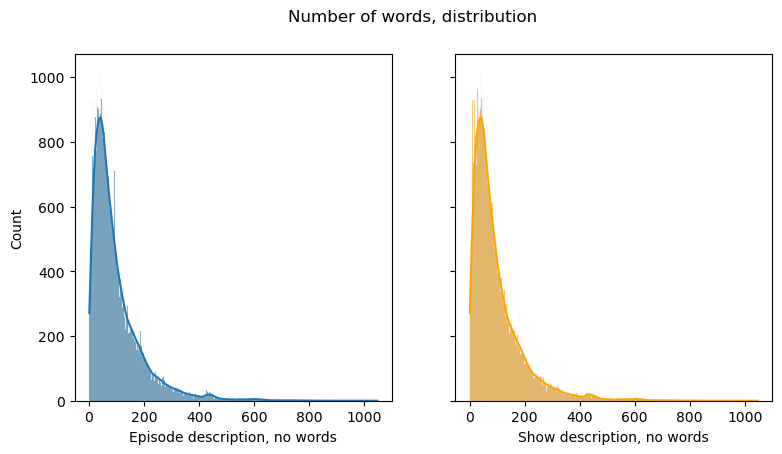

In [73]:
# Word count distributions
# looks like poisson dist?

fig, axs = plt.subplots(1,2, figsize=(9, 4.5), sharey =True)
# fig.tight_layout()

sns.histplot(x = features_df.eps_word_count, discrete = True, kde= True, ax=axs[0])
sns.histplot(x = features_df.show_word_count, discrete = True, kde= True, color="orange", ax=axs[1])
axs[0].set_xlabel("Episode description, no. words")
axs[1].set_xlabel("Show description, no. words")
fig.suptitle("Number of words, distribution")